<a href="https://colab.research.google.com/github/Priyo-prog/Machine-Learning/blob/main/Principal%20Component%20Analysis/principal_components_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis**

* Create some gene data
* Use **PCA()** function from sklearn to do PCA
* Determine how much variation each principal components accounts for
* Draw a fancy PCA graph using matplotlib
* Examin the loading scores to determine what variables have the largest effect on the graph.

## Import important packages

In [8]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Generate sample dataset

* The first thing we do is generate an array of 100 gene names.
* Since this is just an example we name them as "gene1", "gene2" etc.

In [9]:
genes = ['gene' + str(i) for i in range(1,101)]

* Now we create arrays of sample names.
* We have 5 "wild type" or "wt" samples
* 5 "knock out" or "ko" samples

In [10]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

Now we create a pandas dataframe to store the made up data

In [11]:
# The "stars" unpack the "wt" and "ko" arrays so that column names are single array
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

Finally creating the random data.

* For each gene in the "index", we create 5 values for "wt" samples and 5 values for "ko" samples
* The made up datacomes from two possion distribution: one for wt samples and one for ko samples

In [12]:
for gene in data.index:
  data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
  data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [13]:
data.head(), data.shape

(       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
 gene1   49   38   27   47   44  374  357  367  354  397
 gene2  787  732  752  752  705  656  640  674  694  705
 gene3  374  407  436  420  377  409  403  399  389  391
 gene4  612  576  599  632  626  778  799  788  781  751
 gene5  576  552  617  563  586  909  877  882  855  901, (100, 10))

## Preprocessing the data

* Before we do PCA we have to centre and scale the data
* After centering, the average value for each gene will be 0 and after scaling the standard deviation for the values for each gene will be 1
* We are transposing the data, the scale function expects the samples to be rows instead of columns.
* We can also use StandardScaler().fit_transform() as well

In [14]:
scaled_data = preprocessing.scale(data.T)

# Now we are good to go ahead with PCA, create an object of PCA class
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

## Visualize the data

* We will draw a Scree plot
* The frst thing we will do is calculate the percentage of variation that each principal component accounts for.


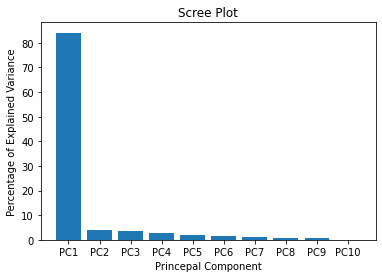

In [17]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# Create labels for the Scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
                                       
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Princepal Component')
plt.title('Scree Plot')
plt.show()                                       

## Draw a PCA plot


In [ ]:
# First put the new coordinates created by pca.transform(scaled.data)
# into a nice matrix where rows have sample labels and columns has PC labels

pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
